In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [200]:
df = pd.read_csv("cubic_zirconia.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [201]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [202]:
df.shape

(26967, 11)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [206]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [132]:
#df.drop(df[df['x']==0].index,inplace=True)
#df.drop(df[df['y']==0].index,inplace=True)
#df.drop(df[df['z']==0].index,inplace=True)

In [207]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [ ]:
x, y,z hasdimension 0 hencecan drop them

In [208]:
df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [209]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price


In [210]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [211]:
df = df.drop(['Unnamed: 0'], axis=1)

In [24]:
#df.head()

In [212]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [213]:
num = []
cat = [] 
for i in df.columns:
    if df[i].dtypes != 'int64'and df[i].dtypes != 'float64':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


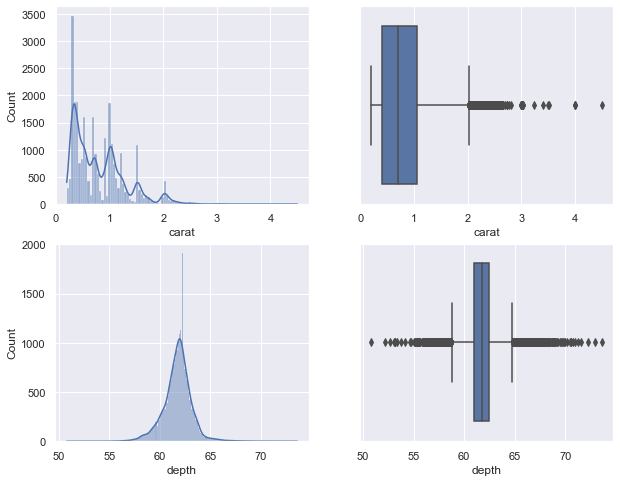

In [214]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['carat'], kde=True, ax=axes[0][0])
sns.boxplot(x='carat', data=df, ax=axes[0][1])
sns.histplot(df['depth'] , kde=True, ax=axes[1][0])
sns.boxplot(x='depth', data=df , ax=axes[1][1])
plt.show()

In [215]:
stats.skew(df.carat)

1.1164186471073052

In [216]:
import scipy.stats as stats

In [217]:
stats.skew(df.depth)

nan

In [218]:
stats.skew(df.table)

0.7657156001245898

In [219]:
stats.skew(df.x)

0.3879644439124368

In [220]:
stats.skew(df.y)

3.849975242918268

In [221]:
stats.skew(df.z)

2.568113876267632

In [222]:
stats.skew(df.price)

1.6184599003049969

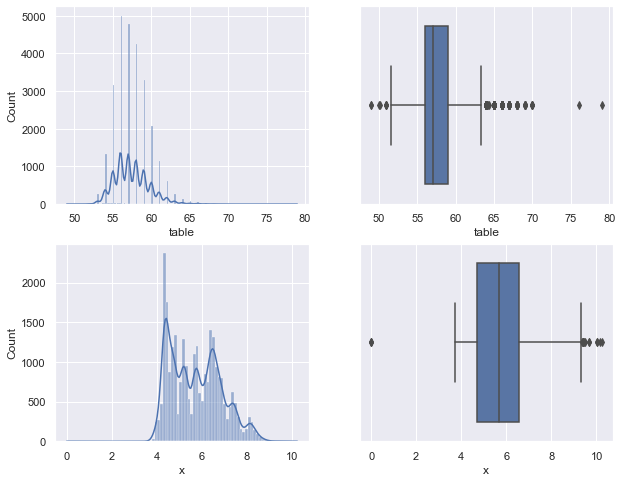

In [223]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['table'], kde=True, ax=axes[0][0])
sns.boxplot(x='table', data=df, ax=axes[0][1])
sns.histplot(df['x'] , kde=True, ax=axes[1][0])
sns.boxplot(x='x', data=df , ax=axes[1][1])
plt.show()

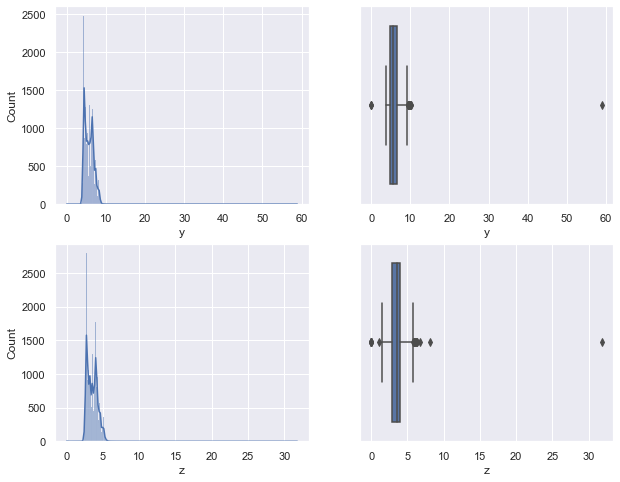

In [224]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['y'], kde=True, ax=axes[0][0])
sns.boxplot(x='y', data=df, ax=axes[0][1])
sns.histplot(df['z'] , kde=True, ax=axes[1][0])
sns.boxplot(x='z', data=df , ax=axes[1][1])
plt.show()

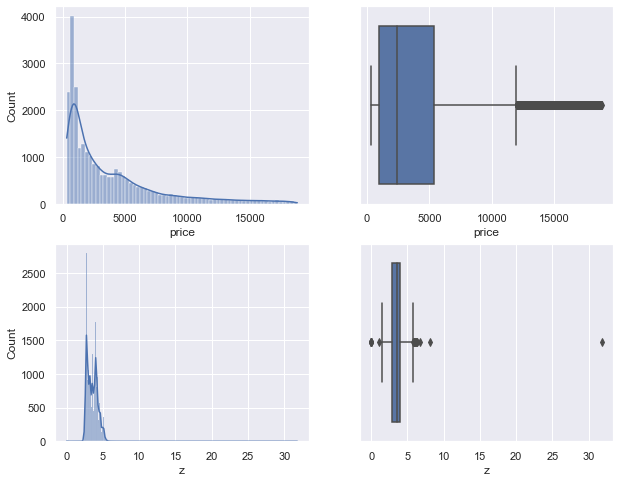

In [225]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['price'], kde=True, ax=axes[0][0])
sns.boxplot(x='price', data=df, ax=axes[0][1])
sns.histplot(df['z'] , kde=True, ax=axes[1][0])
sns.boxplot(x='z', data=df , ax=axes[1][1])
plt.show()

In [226]:
df['cut'].value_counts

<bound method IndexOpsMixin.value_counts of 0            Ideal
1          Premium
2        Very Good
3            Ideal
4            Ideal
           ...    
26962      Premium
26963        Ideal
26964      Premium
26965    Very Good
26966      Premium
Name: cut, Length: 26967, dtype: object>

In [227]:
df['color'].value_counts

<bound method IndexOpsMixin.value_counts of 0        E
1        G
2        E
3        F
4        F
        ..
26962    G
26963    H
26964    E
26965    F
26966    J
Name: color, Length: 26967, dtype: object>

In [228]:
df['clarity'].value_counts

<bound method IndexOpsMixin.value_counts of 0         SI1
1          IF
2        VVS2
3         VS1
4        VVS1
         ... 
26962     SI1
26963      IF
26964     VS2
26965    VVS2
26966     SI1
Name: clarity, Length: 26967, dtype: object>

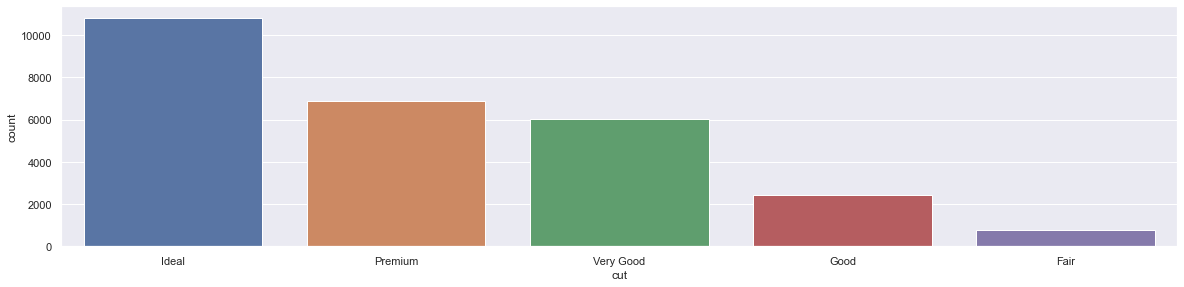

In [229]:
plt.subplots(figsize=(20,15))
#plt.figure(figsize = (15,10))
plt.subplot(3,1,1)
sns.countplot(x=df['cut'])

import warnings
warnings.filterwarnings('ignore')

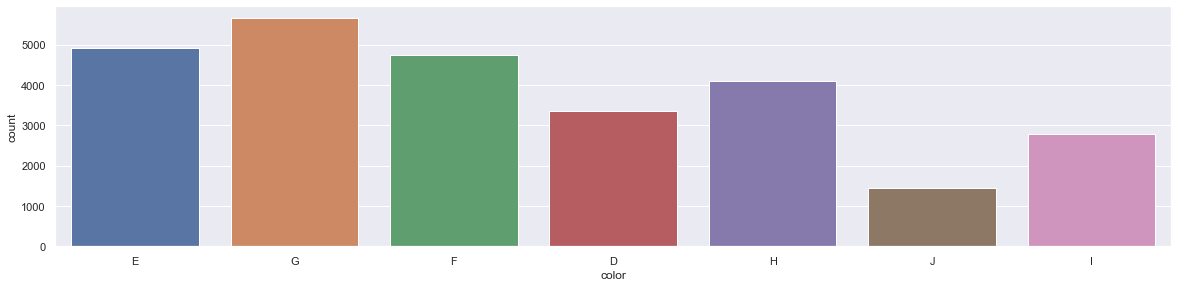

In [230]:
plt.subplots(figsize=(20,15))
#plt.figure(figsize = (15,10))
plt.subplot(3,1,1)
sns.countplot(x=df['color'])

import warnings
warnings.filterwarnings('ignore')

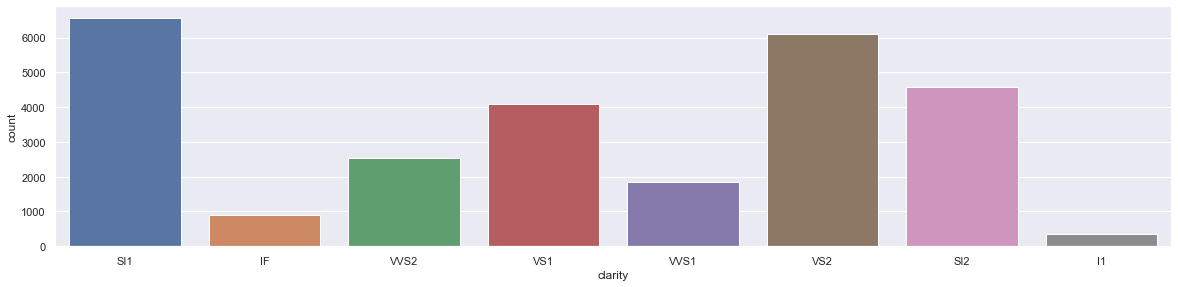

In [231]:
plt.subplots(figsize=(20,15))
#plt.figure(figsize = (15,10))
plt.subplot(3,1,1)
sns.countplot(x=df['clarity'])

import warnings
warnings.filterwarnings('ignore')

In [232]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    plt.subplots(figsize=(25,5))
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [233]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['cut', 'color', 'clarity']

Details of cut
----------------------------------------------------------------
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64


<Figure size 432x288 with 0 Axes>

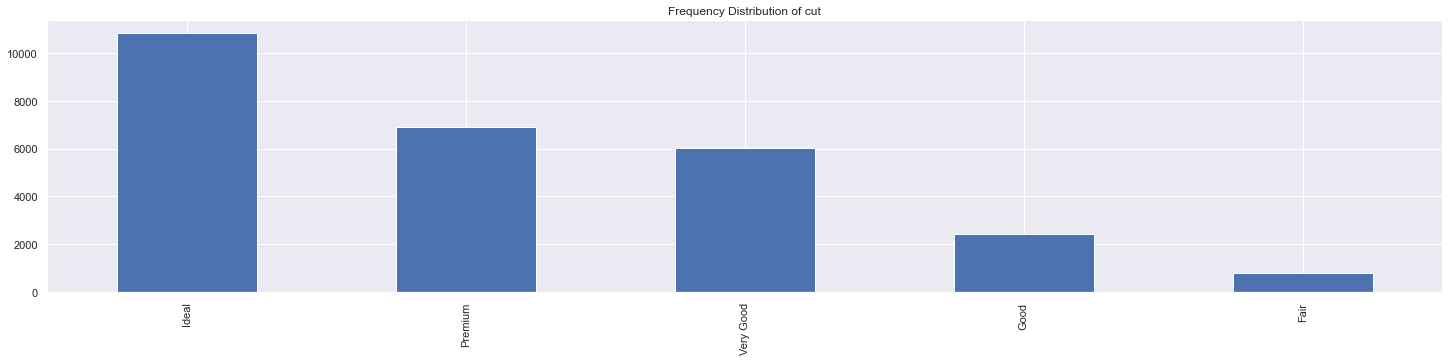

       
Details of color
----------------------------------------------------------------
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


<Figure size 432x288 with 0 Axes>

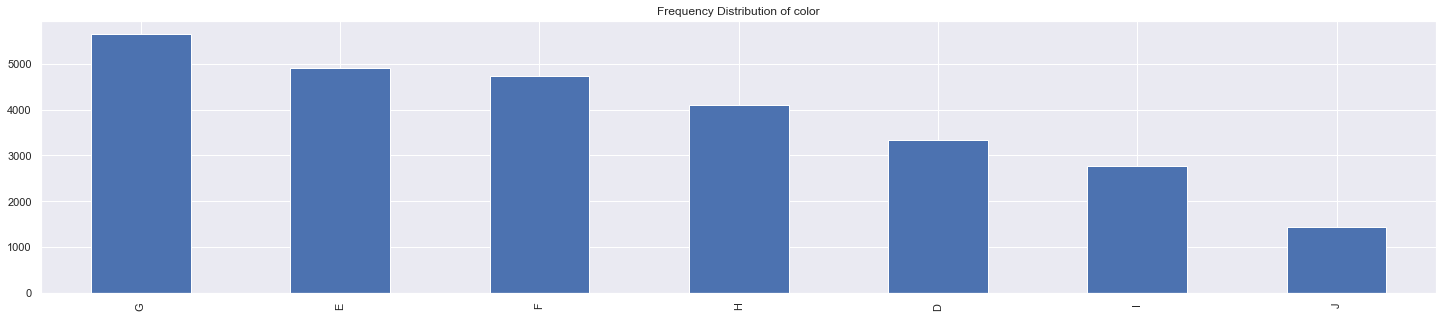

       
Details of clarity
----------------------------------------------------------------
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64


<Figure size 432x288 with 0 Axes>

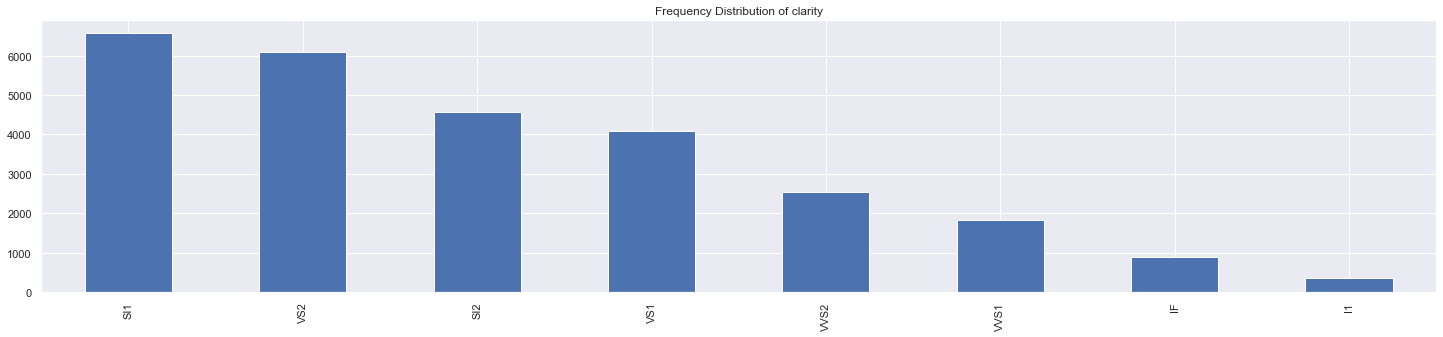

In [234]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

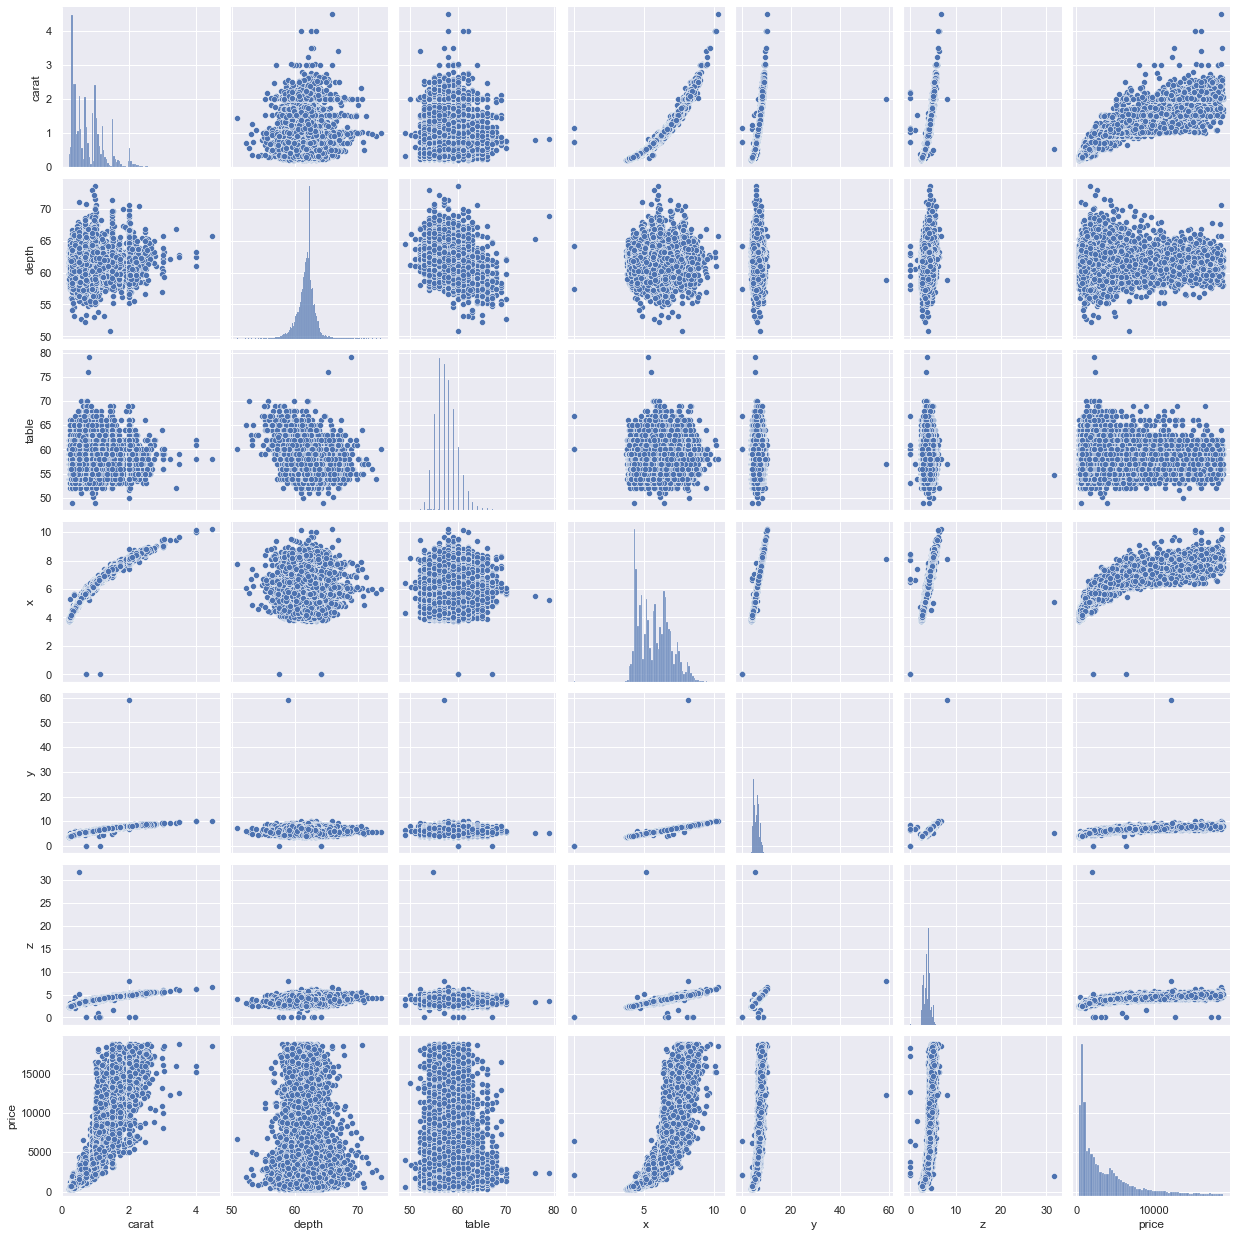

In [235]:
sns.set()
sns.pairplot(df)
plt.show()

In [236]:
corr = df.corr()
corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


<AxesSubplot:>

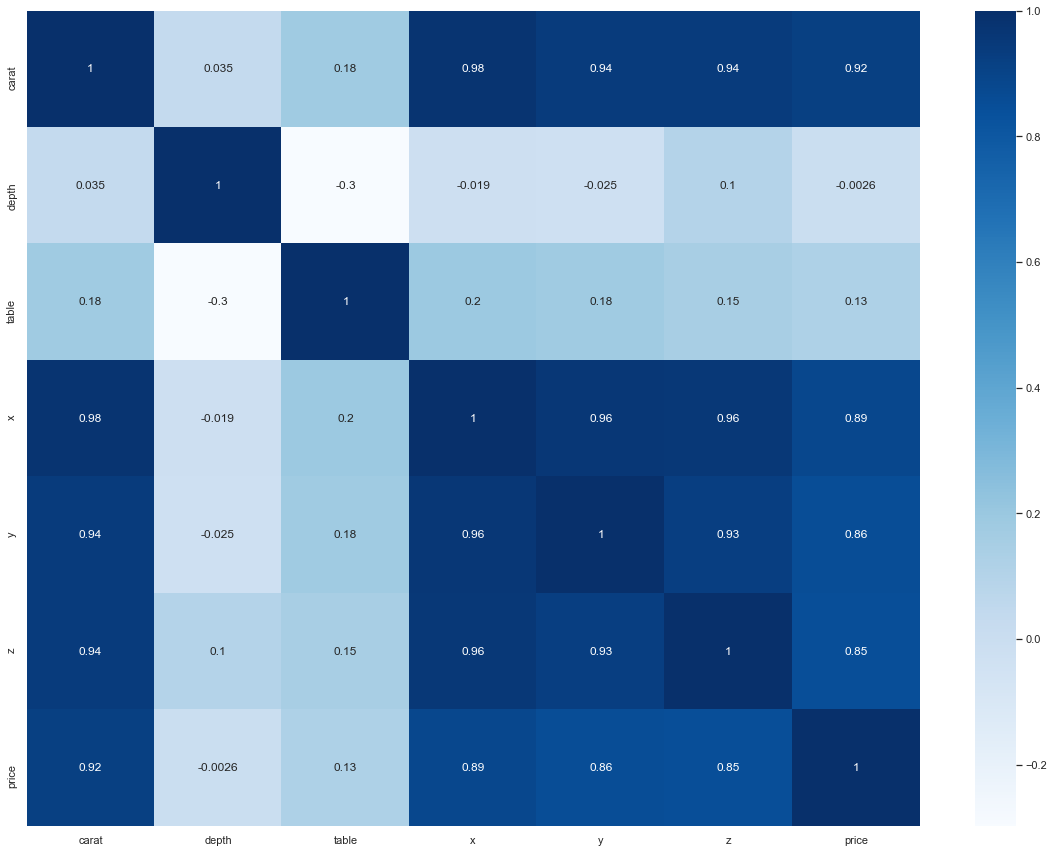

In [237]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='Blues')

In [238]:
median1=df["depth"].median()


df["depth"].replace(np.nan,median1,inplace=True)


In [239]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [240]:
X = df.iloc[:,0:13]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [241]:
df.drop(df[df['x']==0].index,inplace=True)
df.drop(df[df['y']==0].index,inplace=True)
df.drop(df[df['z']==0].index,inplace=True)

In [242]:
df.describe()

,carat,depth,table,x,y,z,price
count,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000
mean,0.798190,61.746758,57.455342,5.730105,5.733832,3.539238,3938.311262
std,0.477602,1.394043,2.231227,1.126714,1.164342,0.717838,4023.359737
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.712500,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5358.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [243]:
df[cat]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [244]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['cut']= label_encoder.fit_transform(df['cut'])
 
df['cut'].unique()

array([2, 3, 4, 1, 0])

In [245]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['color']= label_encoder.fit_transform(df['color'])
 
df['color'].unique()

array([1, 3, 2, 0, 4, 6, 5])

In [246]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['clarity']= label_encoder.fit_transform(df['clarity'])
 
df['clarity'].unique()

array([2, 1, 7, 4, 6, 5, 3, 0])

In [247]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler

In [249]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [250]:
X.head()


,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65


In [251]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [252]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [253]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11293.832347920208
The coefficient for cut is 52.69491242833458
The coefficient for color is -270.0218416027442
The coefficient for clarity is 281.7731786208951
The coefficient for depth is -164.6507565969459
The coefficient for table is -92.24835573540805
The coefficient for x is -1247.9149168678691
The coefficient for y is 2.2804089066716893
The coefficient for z is -47.129741073685445


In [254]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 17184.95769635345


In [255]:
lr=LinearRegression()
lr.fit(X_train,y_train)


y_pred=lr.predict(X_test)

accuracy_lr=cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 8,verbose = 1)
score_lr=lr.score(X_test,y_test)
r2_lr=r2_score(y_test,y_pred)
mse_lr=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_lr}')
print(f'Score is {score_lr}')
print(f'r2_Score is {r2_lr}')
print(f'Mean Squared error is {mse_lr}')

Accuracy is [0.88982952 0.87922603 0.87285418 0.88889068 0.88906454 0.88122526
 0.72235982 0.89173581]
Score is 0.8835781859179958
r2_Score is 0.8835781859179958
Mean Squared error is 1965152.1867285713


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [256]:
# R square on training data
regression_model.score(X_train, y_train)

0.889274840378874

In [257]:
# R square on testing data
regression_model.score(X_test, y_test)

0.8835781859179958

In [258]:
from sklearn import metrics

In [259]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1326.3583885502014

In [260]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1401.8388590449943

In [ ]:
LR using stats

In [261]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
7598,0.71,4,3,4,63.3,59.0,5.52,5.61,3.52,2768
8882,0.30,4,1,5,62.9,58.0,4.27,4.31,2.70,544
22763,0.70,1,4,5,63.9,59.0,5.64,5.60,3.59,2351
6643,0.36,2,1,5,60.2,56.0,4.65,4.62,2.79,1080
18701,1.66,4,5,2,63.0,57.0,7.45,7.50,4.71,8901


In [262]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [263]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y + z' 

In [264]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    17184.957696
carat        11293.832348
cut             52.694912
color         -270.021842
clarity        281.773179
depth         -164.650757
table          -92.248356
x            -1247.914917
y                2.280409
z              -47.129741
dtype: float64

In [265]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 1.683e+04
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:04:07   Log-Likelihood:            -1.6245e+05
No. Observations:               18870   AIC:                         3.249e+05
Df Residuals:                   18860   BIC:                         3.250e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.718e+04    678.456     25.330      0.0

In [266]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [267]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1326.3583885502019

In [268]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

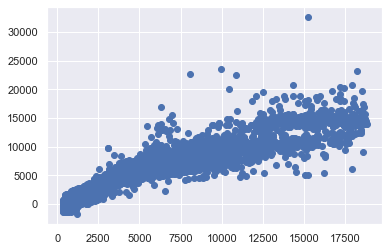

In [269]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [270]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(17184.96) * Intercept + (11293.83) * carat + (52.69) * cut + (-270.02) * color + (281.77) * clarity + (-164.65) * depth + (-92.25) * table + (-1247.91) * x + (2.28) * y + (-47.13) * z + 

In [ ]:
price = b0 + b1 * carat + b2 * cut + b3 * color + b4 * clarity +
b5 * depth + b6 * table + b7 * x + b8 * y +
b9 * z +




In [148]:
Price= (17184.96) * Intercept + (11293.83) * carat + (52.69) * cut + (-270.02) * color + (281.77) * clarity 
+ (-164.65) * depth + (-92.25) * table + (-1247.91) * x + (2.28) * y + (-47.13) * z + 

SyntaxError: invalid syntax (<ipython-input-148-5d0f85c28425>, line 2)

In [ ]:
comparing models

In [271]:
lr=LinearRegression()
lr.fit(X_train,y_train)


y_pred=lr.predict(X_test)

accuracy_lr=cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 8,verbose = 1)
score_lr=lr.score(X_test,y_test)
r2_lr=r2_score(y_test,y_pred)
mse_lr=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_lr}')
print(f'Score is {score_lr}')
print(f'r2_Score is {r2_lr}')
print(f'Mean Squared error is {mse_lr}')

Accuracy is [0.88982952 0.87922603 0.87285418 0.88889068 0.88906454 0.88122526
 0.72235982 0.89173581]
Score is 0.8835781859179958
r2_Score is 0.8835781859179958
Mean Squared error is 1965152.1867285713


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [ ]:
randomforest

In [272]:
regr_rf = RandomForestRegressor(max_depth=2, random_state=0)
regr_rf.fit(X_train,y_train)


y_pred=regr_rf.predict(X_test)

accuracy_regr_rf=cross_val_score(estimator = regr_rf, X = X_train, y = y_train, cv = 8,verbose = 1)
score_regr_rf=regr_rf.score(X_test,y_test)
r2_regr_rf=r2_score(y_test,y_pred)
mse_regr_rf=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_regr_rf}')
print(f'Score is {score_regr_rf}')
print(f'r2_Score is {r2_regr_rf}')
print(f'Mean Squared error is {mse_regr_rf}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is [0.83933631 0.83145001 0.83768789 0.84362886 0.83332936 0.83359172
 0.84823069 0.8425029 ]
Score is 0.8330715924994356
r2_Score is 0.8330715924994356
Mean Squared error is 2817682.6449018414


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.3s finished


In [ ]:
knn

In [273]:
kneigh=KNeighborsRegressor(n_neighbors=2)
kneigh.fit(X_train,y_train)


y_pred=kneigh.predict(X_test)

accuracy_kneigh=cross_val_score(estimator = kneigh, X = X_train, y = y_train, cv = 8,verbose = 1)
score_kneigh=kneigh.score(X_test,y_test)
r2_kneigh=r2_score(y_test,y_pred)
mse_kneigh=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_kneigh}')
print(f'Score is {score_kneigh}')
print(f'r2_Score is {r2_kneigh}')
print(f'Mean Squared error is {mse_kneigh}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s finished


Accuracy is [0.91911103 0.92226693 0.92118274 0.91883065 0.92629299 0.91574254
 0.92563095 0.92716295]
Score is 0.9250516574708584
r2_Score is 0.9250516574708584
Mean Squared error is 1265097.0986337785


In [ ]:
decision tree

In [274]:
dtree = DecisionTreeRegressor(random_state = 0)

dtree.fit(X_train,y_train)


y_pred=dtree.predict(X_test)

accuracy_dtree=cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 8,verbose = 1)
score_dtree=dtree.score(X_test,y_test)
r2_dtree=r2_score(y_test,y_pred)
mse_dtree=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_dtree}')
print(f'Score is {score_dtree}')
print(f'r2_Score is {r2_dtree}')
print(f'Mean Squared error is {mse_dtree}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is [0.95663726 0.9627894  0.96706454 0.95833683 0.95895662 0.96069325
 0.96103479 0.96401768]
Score is 0.9602325355496467
r2_Score is 0.9602325355496467
Mean Squared error is 671258.3920932246


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s finished


In [ ]:
Comparing the performance of different models

In [275]:
models=pd.DataFrame({'Model':['Linear Regression','RandomForest Regression','KNeighbour Regression','Decision Tree Regressor'],
                     'Score':[r2_lr,r2_regr_rf,r2_kneigh,r2_dtree]
                    })

In [276]:
models

,Model,Score
0,Linear Regression,0.883578
1,RandomForest Regression,0.833072
2,KNeighbour Regression,0.925052
3,Decision Tree Regressor,0.960233


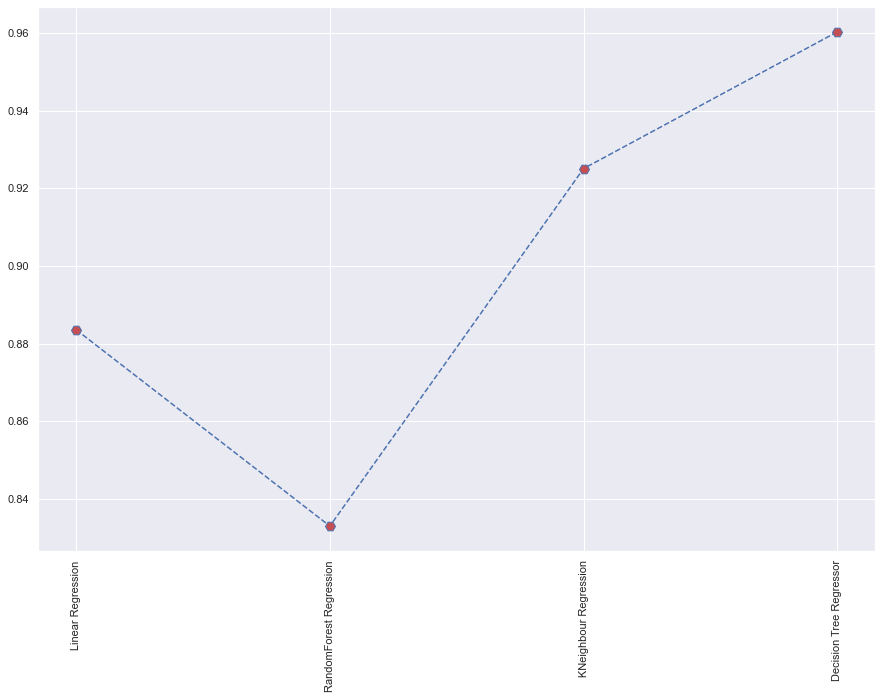

In [277]:
fig = plt.figure(figsize=(15,10))
plt.plot(models.Model,models.Score, linestyle = 'dashed',marker='H',mfc = 'r',ms = 10)
plt.xticks(rotation=90)
plt.show()